In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
data = pd.read_csv('IMDB.csv')

In [26]:
data.sample(10)

,review,sentiment
43691,This comment does contain spoilers!!<br /><br ...,positive
34948,"John Travolta was excellent as ""Michael"" in th...",positive
2911,The arch title doesn't fit this gentle romanti...,positive
9015,Throughout the world the unmistakable imprint ...,positive
34717,Hellraiser: Bloodline is only a so-so film. I ...,negative
18882,The main reason to check this one out is to wa...,positive
24156,"Oh, the sixties. There were some interesting f...",positive
30227,Sergio Martino has impressed me recently with ...,positive
14806,"In terms of the arts, the 1970s were a very tu...",positive
1431,"A powerful ""real-tv"" movie. Very subversive an...",positive


In [27]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['sentiment'])

In [28]:
x = data['review'].values
y = data['label'].values

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [30]:
vocab_size = 10000
embedding_dim = 64
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [31]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [32]:
x_train_pad = pad_sequences(x_train_seq, maxlen=max_length, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length, padding='post', truncating='post')

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(x_train_pad, y_train, epochs=40, validation_data=(x_test_pad, y_test),verbose=2)

Epoch 1/40
1250/1250 - 9s - 7ms/step - accuracy: 0.9682 - loss: 0.0784 - val_accuracy: 0.8628 - val_loss: 0.6818
Epoch 2/40
1250/1250 - 12s - 9ms/step - accuracy: 0.9754 - loss: 0.0654 - val_accuracy: 0.8541 - val_loss: 0.8157
Epoch 3/40
1250/1250 - 13s - 10ms/step - accuracy: 0.9762 - loss: 0.0607 - val_accuracy: 0.8462 - val_loss: 0.9851
Epoch 4/40
1250/1250 - 15s - 12ms/step - accuracy: 0.9765 - loss: 0.0624 - val_accuracy: 0.8592 - val_loss: 0.7677
Epoch 5/40
1250/1250 - 13s - 10ms/step - accuracy: 0.9803 - loss: 0.0511 - val_accuracy: 0.8384 - val_loss: 1.0582
Epoch 6/40
1250/1250 - 13s - 10ms/step - accuracy: 0.9822 - loss: 0.0460 - val_accuracy: 0.8481 - val_loss: 0.9679
Epoch 7/40
1250/1250 - 10s - 8ms/step - accuracy: 0.9833 - loss: 0.0417 - val_accuracy: 0.8419 - val_loss: 0.8810
Epoch 8/40
1250/1250 - 12s - 10ms/step - accuracy: 0.9808 - loss: 0.0489 - val_accuracy: 0.8544 - val_loss: 0.9382
Epoch 9/40
1250/1250 - 11s - 9ms/step - accuracy: 0.9837 - loss: 0.0417 - val_accura

In [39]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print('Test Accuracy : ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 1.2759
Test Accuracy :  0.8579000234603882


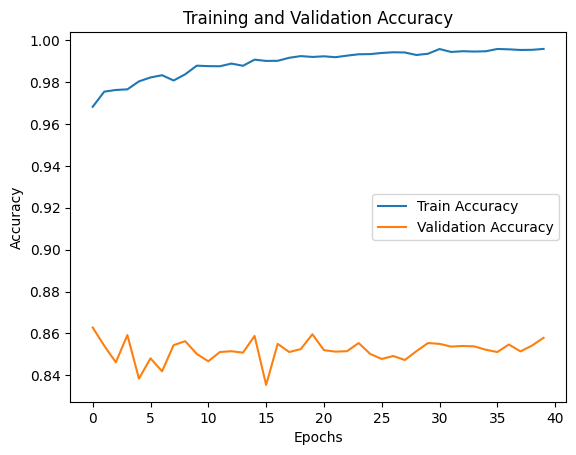

In [40]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

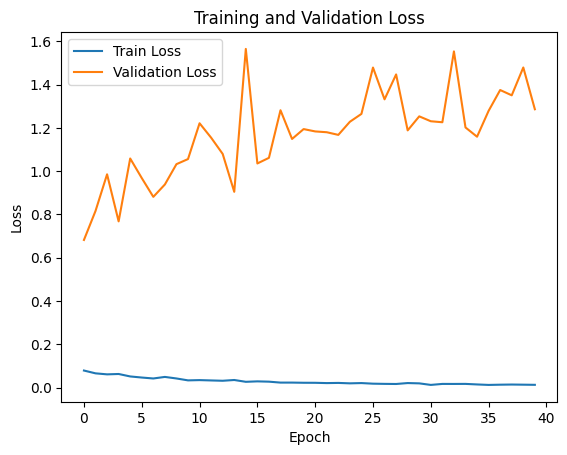

In [41]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [45]:
y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


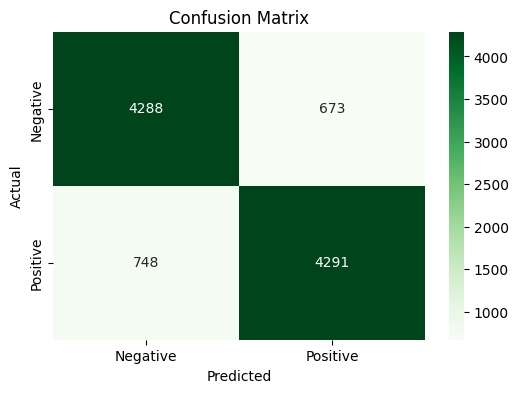

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()